In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

print(tf.test.gpu_device_name())

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00146-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00147-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00148-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]#,"E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00149-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00150-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00151-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00152-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00153-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00154-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00155-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00156-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00157-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00158-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00159-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00160-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00161-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00162-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00163-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00164-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00165-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]
# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')

In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-c2fc58eb-791b-4d0e-9096-44b25a635296-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.312159,287950.75,16.78,66.55,1666.945818,1666.945818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5715.68,487.19,554.00,547.870336,18.928909,540.23,8.376747e+07,9.5,33.097076,26.847086,2572.200198,0.15,141.55,Mirai-udpplain
1,7.663040,110.28,6.00,64.00,0.266213,0.266213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2.03,0.01,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.298089e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
2,0.084227,30523.00,17.00,64.00,8442.058187,8442.058187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312381e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
3,0.000000,0.00,1.00,64.00,5.093716,5.093716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.314976e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
4,0.000000,54.00,6.00,64.00,18.108917,18.108917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.306752e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700010,0.004013,62.80,6.00,63.86,290.660928,290.660928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,0.00,0.02,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,568.80,54.00,55.80,54.157729,0.498308,54.12,8.303401e+07,9.5,10.407429,0.705623,1.705271,0.15,141.55,DDoS-TCP_Flood
700011,0.000000,0.00,0.99,63.36,31.973411,31.973411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,443.34,42.00,44.34,42.180879,0.617394,42.18,8.312442e+07,9.5,9.184764,0.874489,2.990124,0.13,141.55,DDoS-ICMP_Flood
700012,0.060524,46025.00,17.00,64.00,15206.478593,15206.478593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310287e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
700013,0.054773,7019.91,16.61,67.04,6811.375810,6811.375810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.00,0.04,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,560.38,50.00,80.64,53.633587,8.875068,52.10,8.309785e+07,9.5,10.326699,12.564527,482.304620,0.18,141.55,DDoS-UDP_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            108022
DDoS-UDP_Flood              81362
DDoS-TCP_Flood              67551
DDoS-PSHACK_Flood           61485
DDoS-RSTFINFlood            60688
DDoS-SYN_Flood              60677
DDoS-SynonymousIP_Flood     53882
DoS-UDP_Flood               49653
DoS-TCP_Flood               39862
DoS-SYN_Flood               30322
BenignTraffic               16486
Mirai-greeth_flood          14756
Mirai-udpplain              13466
Mirai-greip_flood           11362
DDoS-ICMP_Fragmentation      6948
MITM-ArpSpoofing             4641
DDoS-UDP_Fragmentation       4337
DDoS-ACK_Fragmentation       4221
DNS_Spoofing                 2674
Recon-HostDiscovery          2027
Recon-OSScan                 1430
Recon-PortScan               1188
DoS-HTTP_Flood               1095
VulnerabilityScan             552
DDoS-HTTP_Flood               393
DDoS-SlowLoris                370
DictionaryBruteForce          182
CommandInjection               78
BrowserHijacking               78
SqlInjection  

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

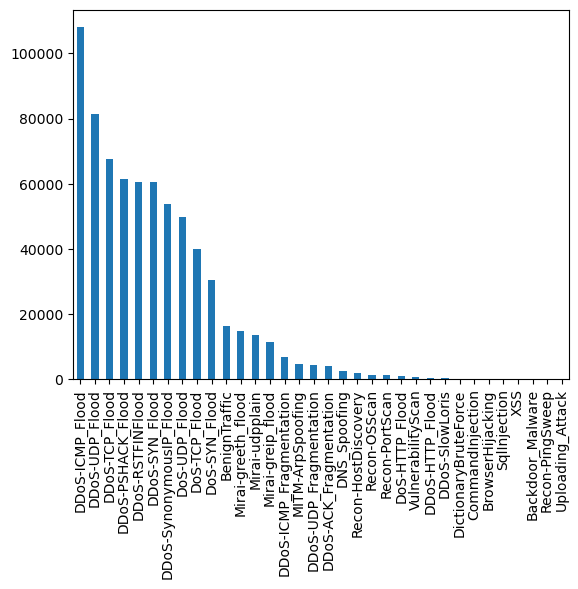

In [6]:
bar_graph('label')

In [7]:
df['label'].unique()

array(['Mirai-udpplain', 'DoS-SYN_Flood', 'DDoS-UDP_Flood',
       'DDoS-ICMP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
       'BenignTraffic', 'DoS-TCP_Flood', 'DDoS-SynonymousIP_Flood',
       'Mirai-greip_flood', 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood',
       'DoS-UDP_Flood', 'DDoS-ICMP_Fragmentation',
       'DDoS-UDP_Fragmentation', 'DoS-HTTP_Flood', 'DNS_Spoofing',
       'CommandInjection', 'DDoS-ACK_Fragmentation', 'Mirai-greeth_flood',
       'Recon-HostDiscovery', 'MITM-ArpSpoofing', 'DDoS-SlowLoris',
       'VulnerabilityScan', 'Recon-OSScan', 'BrowserHijacking',
       'Recon-PortScan', 'Backdoor_Malware', 'DDoS-HTTP_Flood',
       'DictionaryBruteForce', 'XSS', 'Recon-PingSweep',
       'Uploading_Attack', 'SqlInjection'], dtype=object)

In [8]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.312159,287950.75,16.78,66.55,1666.945818,1666.945818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5715.68,487.19,554.00,547.870336,18.928909,540.23,8.376747e+07,9.5,33.097076,26.847086,2572.200198,0.15,141.55,25
1,7.663040,110.28,6.00,64.00,0.266213,0.266213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2.03,0.01,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.298089e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,19
2,0.084227,30523.00,17.00,64.00,8442.058187,8442.058187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312381e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
3,0.000000,0.00,1.00,64.00,5.093716,5.093716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.314976e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
4,0.000000,54.00,6.00,64.00,18.108917,18.108917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.306752e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700010,0.004013,62.80,6.00,63.86,290.660928,290.660928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,0.00,0.02,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,568.80,54.00,55.80,54.157729,0.498308,54.12,8.303401e+07,9.5,10.407429,0.705623,1.705271,0.15,141.55,13
700011,0.000000,0.00,0.99,63.36,31.973411,31.973411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,443.34,42.00,44.34,42.180879,0.617394,42.18,8.312442e+07,9.5,9.184764,0.874489,2.990124,0.13,141.55,6
700012,0.060524,46025.00,17.00,64.00,15206.478593,15206.478593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310287e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
700013,0.054773,7019.91,16.61,67.04,6811.375810,6811.375810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.00,0.04,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,560.38,50.00,80.64,53.633587,8.875068,52.10,8.309785e+07,9.5,10.326699,12.564527,482.304620,0.18,141.55,14


In [9]:
x=df.drop(columns=['label'])
y=df['label']

In [10]:
y

0         25
1         19
2         14
3          6
4         13
          ..
700010    13
700011     6
700012    14
700013    14
700014     6
Name: label, Length: 700015, dtype: int32

In [11]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 560012
Testing set: 140003


In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.8026756569502083
precision: 0.8106919003499431
recall:  0.8026756569502083
f1:  0.7686544308352934


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9935144246908995
precision: 0.9931195496105166
recall:  0.9935144246908995
f1:  0.9930243153637232


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.6745498310750484
precision: 0.6706902143961966
recall:  0.6745498310750484
f1:  0.6408671176994032


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

accuracy 0.9858184255729189
precision:  0.9861669104580681
recall:  0.9858184255729189
f1: 0.9856663439882749


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# neural network

In [17]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [18]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(560012, 46)
(560012, 34)
(140003, 46)
(140003, 34)


In [20]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [21]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [22]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
6991/7001 [============================>.] - ETA: 0s - loss: 0.4484 - accuracy: 0.8004
Epoch 1: val_accuracy improved from -inf to 0.82020, saving model to nn.hdf5
7001/7001 [==============================] - 13s 2ms/step - loss: 0.4484 - accuracy: 0.8004 - val_loss: 0.3989 - val_accuracy: 0.8202
Epoch 2/20
6979/7001 [============================>.] - ETA: 0s - loss: 0.2642 - accuracy: 0.8909
Epoch 2: val_accuracy improved from 0.82020 to 0.92837, saving model to nn.hdf5
7001/7001 [==============================] - 12s 2ms/step - loss: 0.2639 - accuracy: 0.8910 - val_loss: 0.1997 - val_accuracy: 0.9284
Epoch 3/20
6988/7001 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9478
Epoch 3: val_accuracy improved from 0.92837 to 0.95368, saving model to nn.hdf5
7001/7001 [==============================] - 12s 2ms/step - loss: 0.1359 - accuracy: 0.9478 - val_loss: 0.1125 - val_accuracy: 0.9537
Epoch 4/20
6978/7001 [============================>.] - ETA: 0s - l

Text(0, 0.5, 'accuracy')

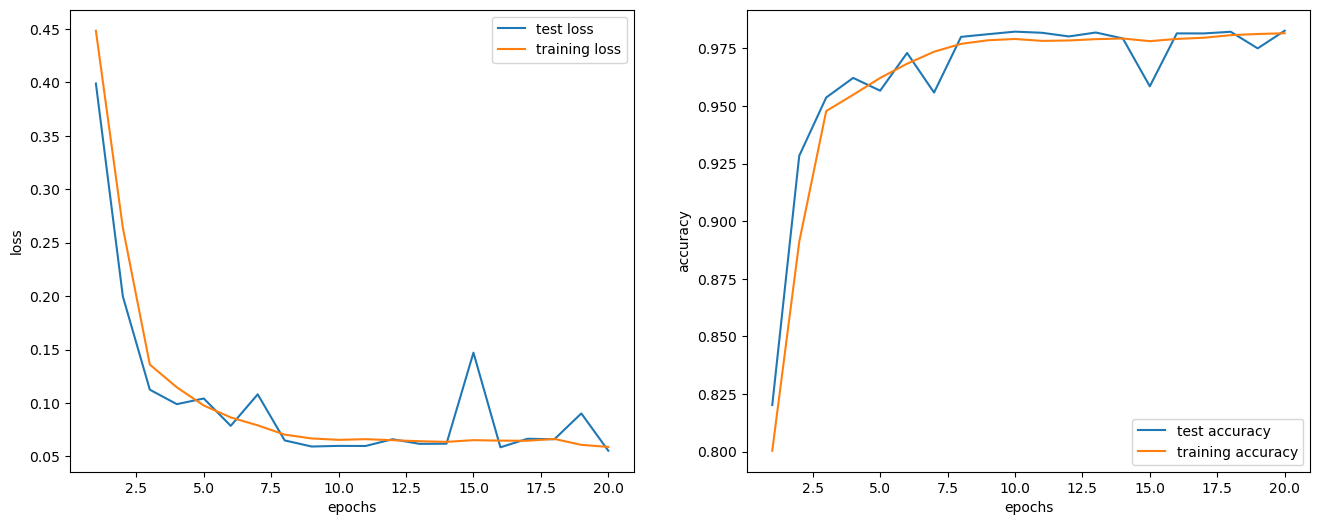

In [23]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [24]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

4376/4376 [==============================] - 3s 755us/step
Precision score:  0.980364325675892
Recall score:  0.9829575080533989
F1 score:  0.9812629177229037


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
